## Stacked Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../../data/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph() 

In [6]:
# 784
# 392
# 196
# 784

### Parameters

In [7]:
num_inputs = 784
num_hid1 = 392
num_hid2 = 196
num_hid3 = num_hid1
num_outputs = num_inputs

learning_rate = 0.01


#### Activation function

In [8]:
actf = tf.nn.relu

### Placeholder

In [9]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Weights and Biases

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [10]:
initializer = tf.variance_scaling_initializer()

In [11]:
w1 = tf.Variable(initializer([num_inputs, num_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([num_hid1, num_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([num_hid2, num_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([num_hid3, num_outputs]), dtype=tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
b1 = tf.Variable(tf.zeros(num_hid1))
b2 = tf.Variable(tf.zeros(num_hid2))
b3 = tf.Variable(tf.zeros(num_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [14]:
act_fc = tf.nn.relu

In [15]:
hid_layer1 = act_fc(tf.matmul(X, w1) + b1)
hid_layer2 = act_fc(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_fc(tf.matmul(hid_layer2, w3) + b3)
output_layer = act_fc(tf.matmul(hid_layer3, w4) + b4)

### Loss function

In [16]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [18]:
train = optimizer.minimize(loss)

### Initialize

In [19]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [26]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for iter in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
        
        training_loss = loss.eval(feed_dict = {X:X_batch})
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
        
    saver.save(sess, '../../models/stacked_autoencoder.ckpt')

Epoch 0 Complete. Training Loss: 0.02527608722448349
Epoch 1 Complete. Training Loss: 0.023659104481339455
Epoch 2 Complete. Training Loss: 0.02172543667256832
Epoch 3 Complete. Training Loss: 0.021598435938358307
Epoch 4 Complete. Training Loss: 0.021805334836244583


### Test Autoencoder output on Test Data

In [27]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, '../../models/stacked_autoencoder.ckpt')
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../../model/stacked_autoencoder.ckpt


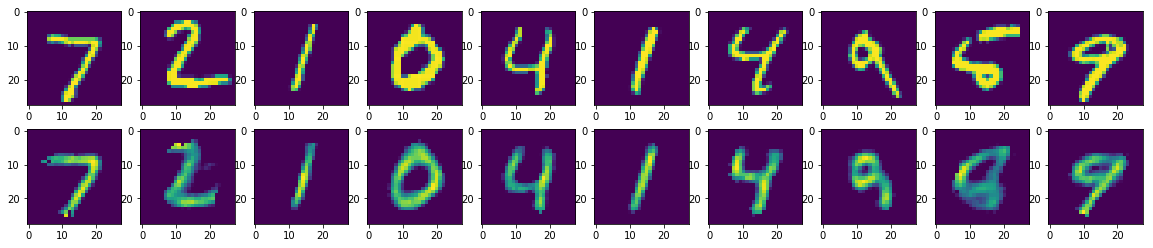

In [30]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))